<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Project: Survey of Smoking</h1>

## 本项目旨在探索中国香烟市场与世界香烟市场进行比较下的不同，并希望找到一些解决方案
### 在项目中的数据集来自于WHO以及GDB
### 网址：http://www.healthdata.org/data-tools 和who的一些report

<center> <font size=6>一：加载

In [1]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

%matplotlib inline  

In [2]:
data1 = pd.read_csv('GXDX_DATA/DATA.csv') 

<center> <font size=6> 二、抽样观察数据情况

In [3]:
data1.head()

,location_id,location_name,sex_id,sex,age_group_id,age_group_name,year_id,measure,metric,mean,lower,upper
0,1,Global,1,Male,7,10 to 14,1980,Daily smoking prevalence,Percent,2.652072e-02,2.341522e-02,3.059005e-02
1,1,Global,1,Male,7,10 to 14,1980,Daily smoking prevalence,Number,6.754384e+06,5.963466e+06,7.790774e+06
2,1,Global,1,Male,8,15 to 19,1980,Daily smoking prevalence,Number,4.045704e+07,3.570641e+07,4.596038e+07
3,1,Global,1,Male,8,15 to 19,1980,Daily smoking prevalence,Percent,1.768497e-01,1.560833e-01,2.009064e-01
4,1,Global,1,Male,9,20 to 24,1980,Daily smoking prevalence,Number,7.430238e+07,6.739065e+07,8.305407e+07


可以看到的是数据集不存在缺省值（不仅是head没有，excel确实所有的值都有相应的合理的值）

*解释一下matrix：每个年龄段对应两个matrix，number表示这个年龄段总的吸烟人数，而percent表示吸烟人数占该年龄段人数比值*

接下来看一下数据规模：

In [4]:
print data1

        location_id location_name  sex_id   sex  age_group_id  \
0                 1        Global       1  Male             7   
1                 1        Global       1  Male             7   
2                 1        Global       1  Male             8   
3                 1        Global       1  Male             8   
4                 1        Global       1  Male             9   
5                 1        Global       1  Male             9   
6                 1        Global       1  Male            10   
7                 1        Global       1  Male            10   
8                 1        Global       1  Male            11   
9                 1        Global       1  Male            11   
10                1        Global       1  Male            12   
11                1        Global       1  Male            12   
12                1        Global       1  Male            13   
13                1        Global       1  Male            13   
14                1      

数据规模非常大，有855573行x12列，在处理的时候可能需要考虑到时间复杂度的问题了

<center> <font size=6>三、数据处理

## 首先确立研究对象：针对不同的年龄段、性别观察中国、世界吸烟人数变化，并基于此进行探究

In [5]:
data_of_China = data1[data1["location_name"]=="China"]
data_of_China.head()

,location_id,location_name,sex_id,sex,age_group_id,age_group_name,year_id,measure,metric,mean,lower,upper
11016,6,China,1,Male,7,10 to 14,1980,Daily smoking prevalence,Number,9.506608e+05,8.333546e+05,1.088490e+06
11017,6,China,1,Male,7,10 to 14,1980,Daily smoking prevalence,Percent,1.429391e-02,1.253012e-02,1.636627e-02
11018,6,China,1,Male,8,15 to 19,1980,Daily smoking prevalence,Percent,1.609159e-01,1.458106e-01,1.775928e-01
11019,6,China,1,Male,8,15 to 19,1980,Daily smoking prevalence,Number,8.819050e+06,7.991198e+06,9.733032e+06
11020,6,China,1,Male,9,20 to 24,1980,Daily smoking prevalence,Number,1.876060e+07,1.762117e+07,1.992164e+07


取出所有的中国数据

In [6]:
data_of_Global = data1[data1["location_name"]=="Global"]
data_of_Global.head()

,location_id,location_name,sex_id,sex,age_group_id,age_group_name,year_id,measure,metric,mean,lower,upper
0,1,Global,1,Male,7,10 to 14,1980,Daily smoking prevalence,Percent,2.652072e-02,2.341522e-02,3.059005e-02
1,1,Global,1,Male,7,10 to 14,1980,Daily smoking prevalence,Number,6.754384e+06,5.963466e+06,7.790774e+06
2,1,Global,1,Male,8,15 to 19,1980,Daily smoking prevalence,Number,4.045704e+07,3.570641e+07,4.596038e+07
3,1,Global,1,Male,8,15 to 19,1980,Daily smoking prevalence,Percent,1.768497e-01,1.560833e-01,2.009064e-01
4,1,Global,1,Male,9,20 to 24,1980,Daily smoking prevalence,Number,7.430238e+07,6.739065e+07,8.305407e+07


取出所有全球的数据

In [7]:
sex_group_name = data_of_China["sex"].unique()
age_group_name = data_of_China["age_group_name"].unique()
year_range = data_of_China["year_id"].unique()
print age_group_name  , sex_group_name , year_range

['10 to 14' '15 to 19' '20 to 24' '25 to 29' '30 to 34' '35 to 39'
 '40 to 44' '45 to 49' '50 to 54' '55 to 59' '60 to 64' '65 to 69'
 '70 to 74' '75 to 79' '80 plus' 'All Ages' 'Age-standardized'] ['Male' 'Female' 'Both'] [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015]


取得了所有的年龄组keys(17个)，其中Age_standardized是一个统计学概念，舍弃不看

In [8]:
def My_plot_curve(dataset1, dataset2, key_x, key_y, title): #Function for drawing curve
    plt.title(title)
    plt.xlabel(key_x)
    plt.ylabel(key_y)
    plt.plot(dataset1[key_x],dataset1[key_y],label = "China")
    plt.plot(dataset2[key_x],dataset2[key_y],label = "Global")
    plt.legend()
    plt.xlabel('year')
    plt.ylabel('Percent of people smoking')
    plt.show()
#plt.plot(x1, y1,'r', label='broadcast')  
#plt.plot(x2, y2,'b',label='join')  
#plt.xticks(x1, group_labels, rotation=0)  

In [9]:
def plot_age_group(age):
        each = age
        data1 = data_of_China[data_of_China["metric"] == "Percent"]
        data1 = data1[data1["age_group_name"] == each]
        data1 = data1[["year_id","mean","sex"]]
        
        data2 = data_of_Global[data_of_Global["metric"] == "Percent"]
        data2 = data2[data2["age_group_name"] == each]
        data2 = data2[["year_id","mean","sex"]]
        for each_sex in sex_group_name:
            data1_little = data1[data1["sex"] == each_sex]
            data2_little = data2[data2["sex"] == each_sex]
            My_plot_curve(data1_little,data2_little,"year_id","mean","Age between "+each+" 's " + each_sex + " change with the year in china")

- 本来写了一个循环，直接出来了几十个图，不方便叙述分析，所以拆成函数方便分析
- 其中，metric选择Percent，因为本分析的目的是为了中国与全球进行比较，如果选用Number，全球的数量非常多，会使得两者的差异和共同点被掩盖

<center> <font size=6>四、可视化与分析

<center> <font size=4>分析主要以三个维度展开：1.趋势，2.性别之间的比较，3.中国与世界的异同

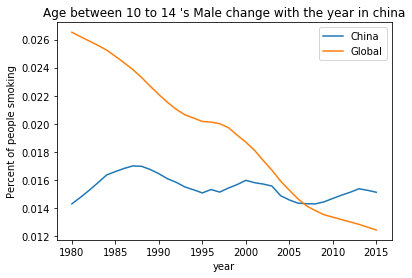

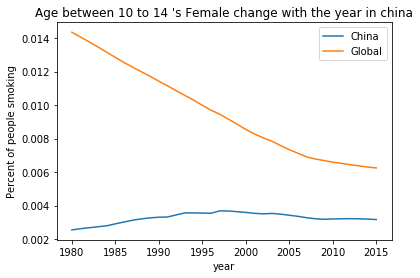

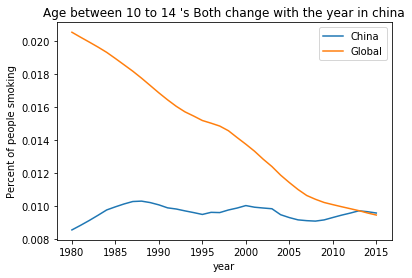

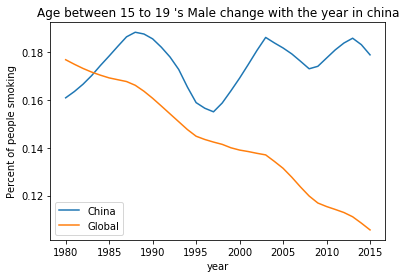

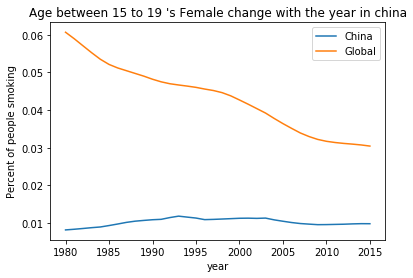

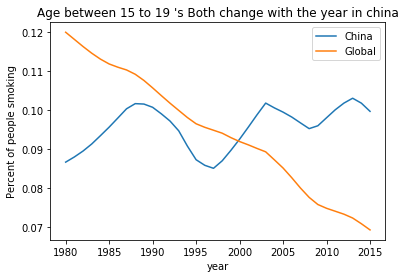

In [10]:
plot_age_group('10 to 14')
plot_age_group('15 to 19')

## 分析：10~19岁属于青少年，是最不应该接触到烟草的年龄
- 中国：趋势：基本不变。 性别之间的比较：男性比例高，女性较少
- 世界：趋势：急速下降。性别之间的比较：男性下降最快、降低比例最高
- 中国与世界的比较：对于最不应该接触到烟草的年龄，全球的下降趋势令人很欣慰。但中国青少年，尤其是青少年男性的吸烟比例仍是很严峻的问题。不过值得庆贺的是中国在10~14岁的幼年吸烟比例相比全球较低。

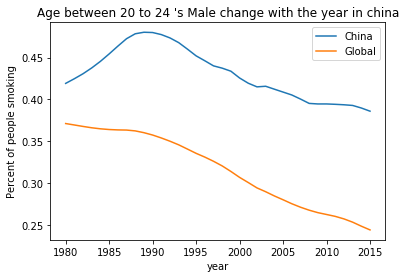

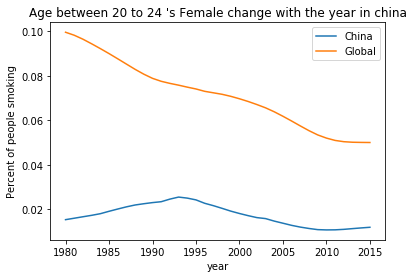

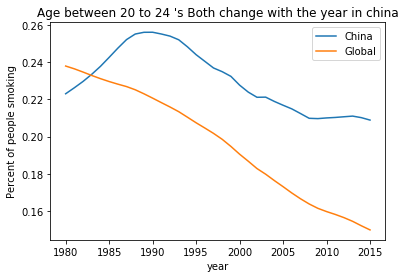

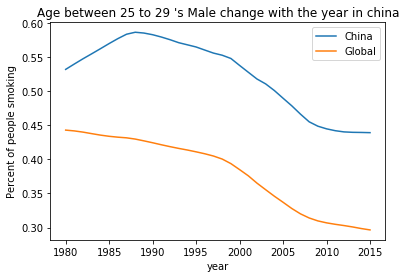

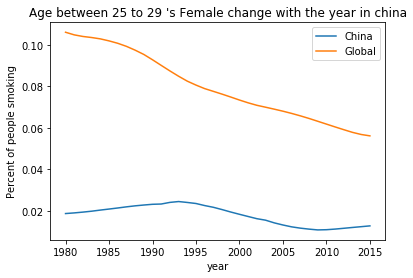

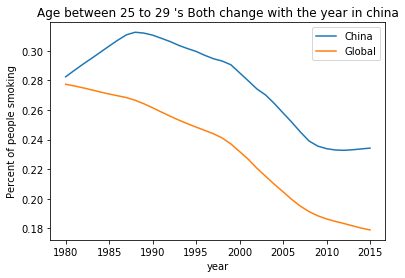

In [11]:
plot_age_group('20 to 24')
plot_age_group('25 to 29')

## 分析：20~29岁处于人生的青壮年，烟草开始不再是禁忌
- 中国：中国在1980~1988年期间吸烟比例有明显的上升，这段时间处于改革开放初期，经过查找资料发现：
### 改革开放后中国香烟行业进入了第一个春天，当时没有法律的约束，人口激增，香烟需求量猛增，直到1982年发布了《烟草专卖条例》才开启了控烟之路，但控烟因为各方面原因依然举步维艰
这也就解释了为什么在1982年附近中国吸烟人口的激增——正是这种激增促成了控烟法案的颁布。而在1989年之后中国吸烟比例开始下降，但下降幅度较小，男性吸烟比例非常高。

- 世界：趋势：稳步下降。性别之间的比较：男性吸烟比例下降的最快。

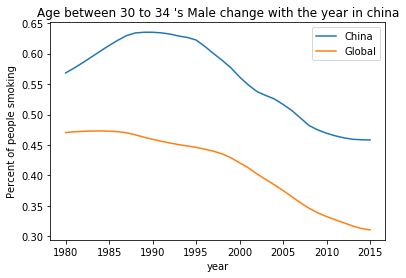

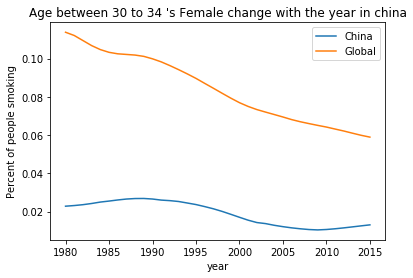

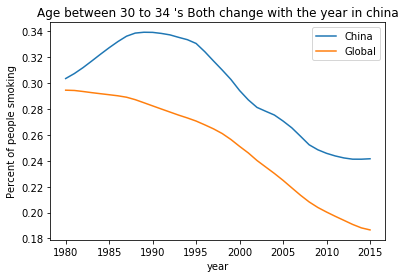

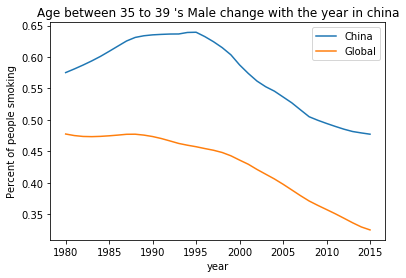

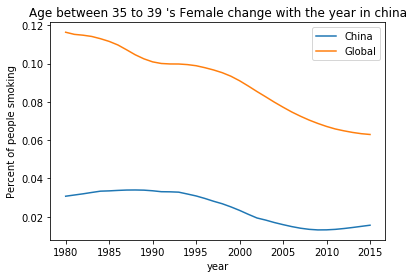

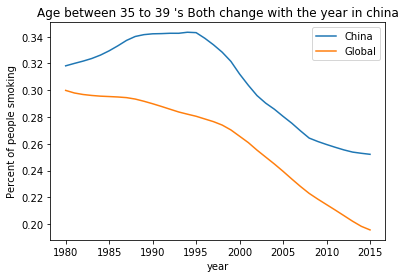

In [12]:
plot_age_group('30 to 34')
plot_age_group('35 to 39')

## 分析：30~39处于人生壮年，烟草对很多人而言已经成了习惯。
- 中国：1990~1995年达到了吸烟比例的高峰，之后有所下降但幅度较小。查阅资料发现：
### 中国于1991年通过了《中华人民共和国烟草专卖法》，对于烟草行业进行了整顿。
规模化、规范化、合法化、更有保障的烟草质量或许是这个年龄段的人更多的选择香烟的原因。
    

- 世界：趋势：稳步下降。性别之间的比较：男性远多于女性。

- 中国与世界的比较：中国女性吸烟者更少，而男性吸烟比例远高于国际水平。

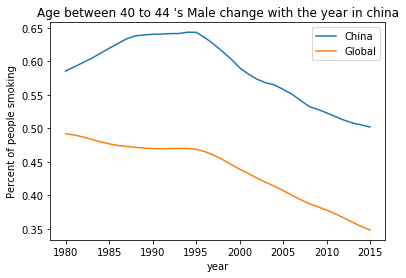

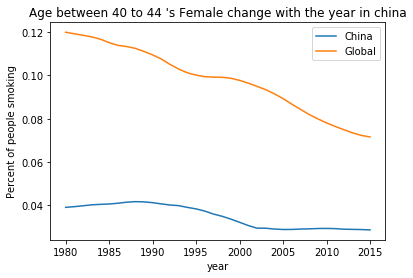

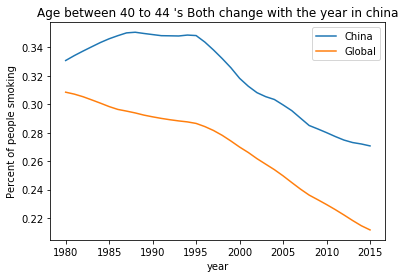

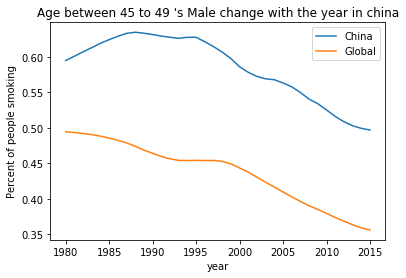

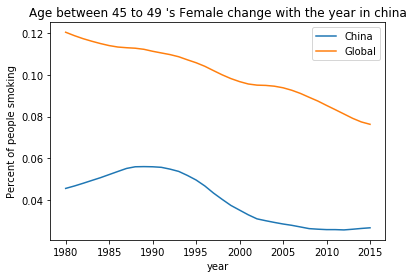

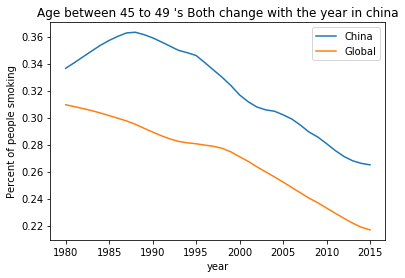

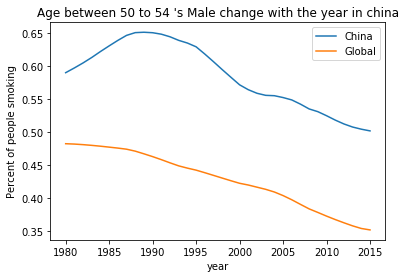

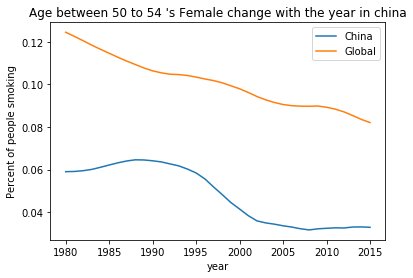

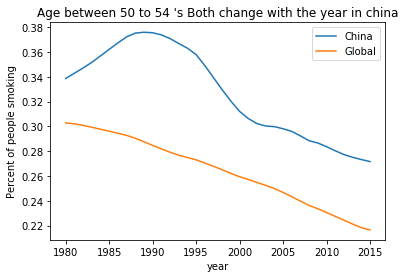

In [13]:
plot_age_group('40 to 44')
plot_age_group('45 to 49')
plot_age_group('50 to 54')

## 分析：40~54岁处于人生的中年，吸烟对很多人已成为了习惯。
- 中国：与30~39岁的趋势基本相同，男性远大于女性。
- 世界：趋势：稳步下降。性别之间的比较：男性远多于女性。

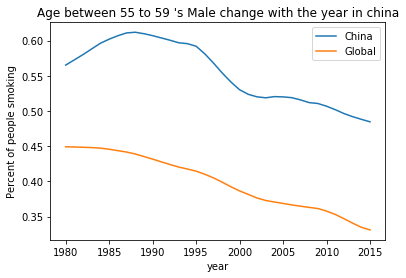

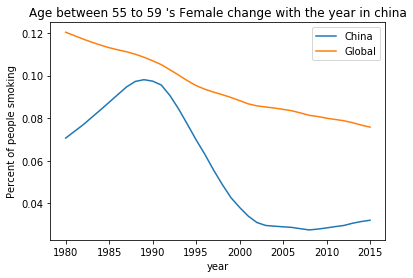

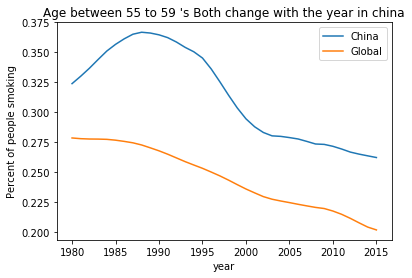

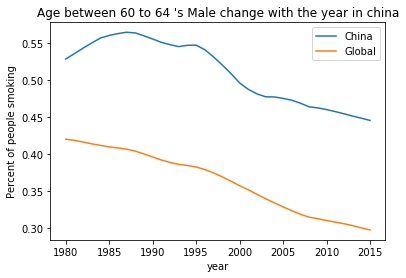

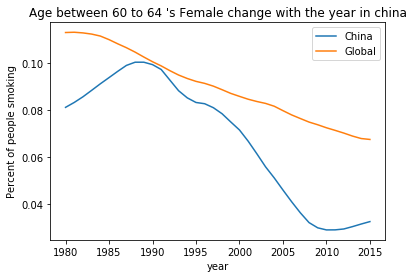

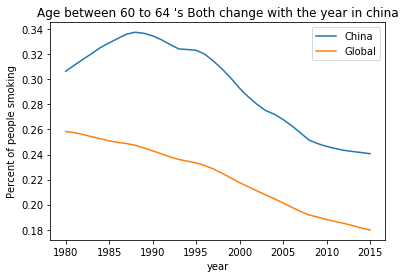

In [14]:
plot_age_group('55 to 59')
plot_age_group('60 to 64')

## 分析：55~64已经到了退休的年龄，可能会有人选择香烟打发剩余的时光。
- 中国：图像基本与之前几次分析相同，但有趣的是：
### 中国男性55~59岁和60~64岁的图像很相似，但60~64岁的图像很明显的是55~59岁的图像向下平移5%的结果，这或许可以间接地佐证男性长期吸烟可能会导致更早的死亡。而中国这个年龄段的女性也符合前面分析过的增长趋势，不再赘述
    
    
- 世界：有所下降，但下降比例与前面的年龄段相比较小。男性仍然是吸烟者主力。

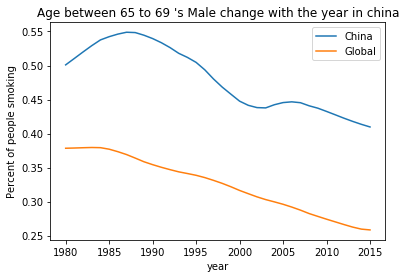

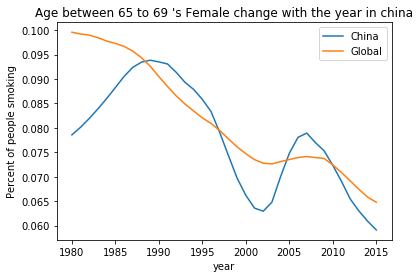

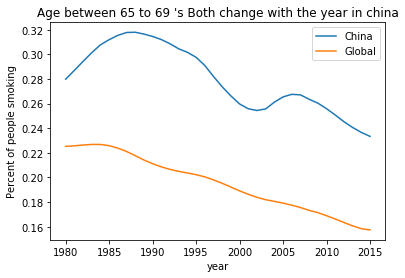

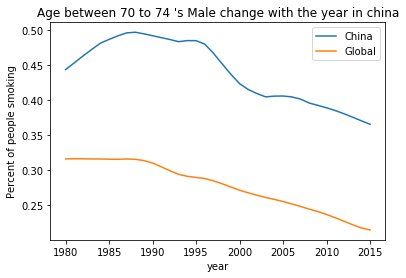

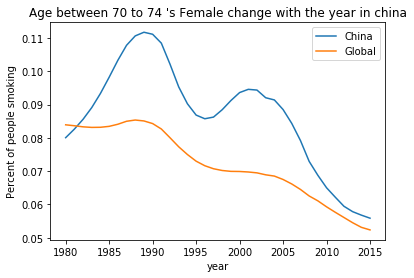

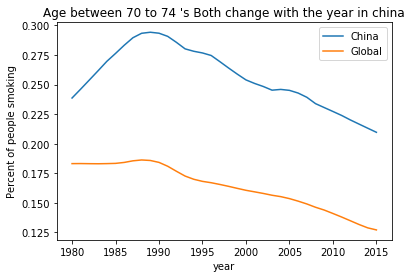

In [15]:
plot_age_group('65 to 69')
plot_age_group('70 to 74')

## 分析：65~74岁处于人生的最后一段时光，烟草可能仍是生活的伴侣
- 中国：这个年龄段在2000年左右男性和女性都有一段增长，男性而言浮动不大，但女性吸烟率有一个激增。查阅资料发现：
##### 资料来源：https://wenku.baidu.com/view/9c0d17b8960590c69ec37623.html（中国香烟发展报告）
### 在2000年左右，中国烟草业仍被视作支柱行业（因为其较高的税收），且全国烟草工作着重于质量的提升，烟草行业的进一步规范化或许是这次增长的原因。
中国男性吸烟图像继续下降了5%，进一步佐证了之前的猜测
    
- 世界：有所下降，但下降比例与前面的年龄段相比较小。男性仍然是吸烟者主力。

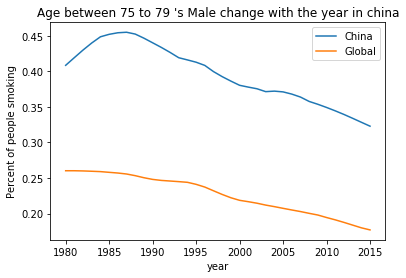

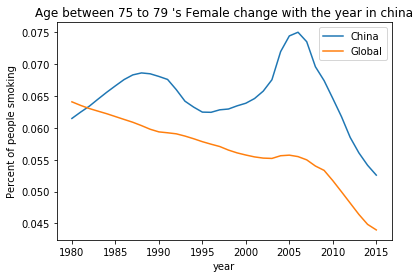

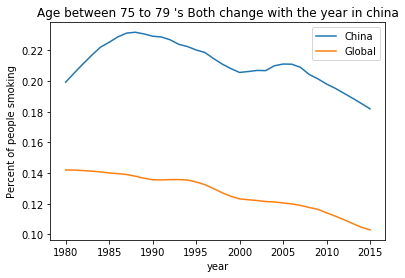

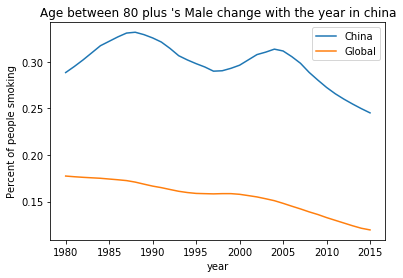

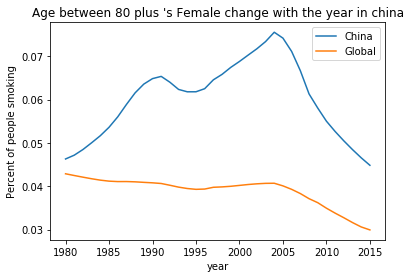

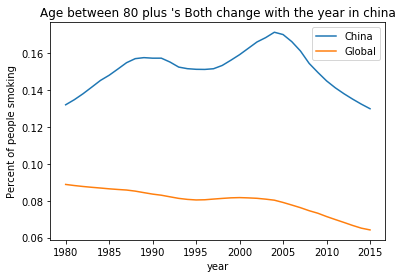

In [16]:
plot_age_group('75 to 79')
plot_age_group('80 plus')

## 分析：75岁以上是人生的老年，吸烟的人口比例的减少或许就昭示这吸烟对人体的伤害...


<center><font size = 4>为了探究吸烟与健康的关联，接下来是中国男性吸烟者Number以及percent关于年龄的变化：(1990年和2010年）

In [17]:
datanan = data_of_China[data_of_China["sex"] == "Male"]
datanan1 = datanan[datanan["year_id"] == 1990]
datanan2 = datanan[datanan["year_id"] == 2010]
datanan1 = datanan1[datanan1["age_group_id"] != 22]
datanan1 = datanan1[datanan1["age_group_id"] != 27]
datanan2 = datanan2[datanan2["age_group_id"] != 22]
datanan2 = datanan2[datanan2["age_group_id"] != 27]
datanan1.head()

,location_id,location_name,sex_id,sex,age_group_id,age_group_name,year_id,measure,metric,mean,lower,upper
12036,6,China,1,Male,7,10 to 14,1990,Daily smoking prevalence,Percent,1.643898e-02,1.435107e-02,1.876284e-02
12037,6,China,1,Male,7,10 to 14,1990,Daily smoking prevalence,Number,8.355799e+05,7.294529e+05,9.536996e+05
12038,6,China,1,Male,8,15 to 19,1990,Daily smoking prevalence,Percent,1.855870e-01,1.687157e-01,2.025197e-01
12039,6,China,1,Male,8,15 to 19,1990,Daily smoking prevalence,Number,1.180753e+07,1.073413e+07,1.288483e+07
12040,6,China,1,Male,9,20 to 24,1990,Daily smoking prevalence,Number,3.163650e+07,2.980052e+07,3.347259e+07


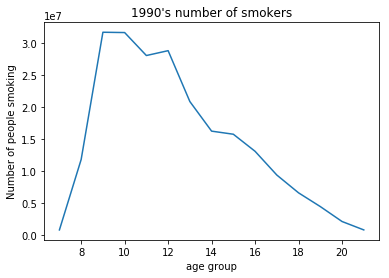

In [18]:
plt.title("1990's number of smokers")
plt.xlabel("range of age")
plt.ylabel("Number")
plt.plot(datanan1[datanan1["metric"]=="Number"]["age_group_id"],datanan1[datanan1["metric"]=="Number"]["mean"])
plt.xlabel('age group')
plt.ylabel('Number of people smoking')
plt.show()

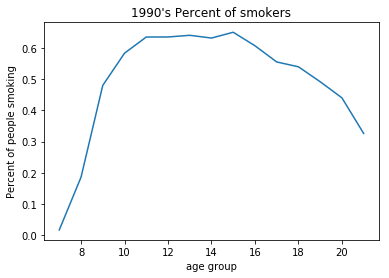

In [19]:
plt.title("1990's Percent of smokers")
plt.xlabel("range of age")
plt.ylabel("Percent")
plt.plot(datanan1[datanan1["metric"]=="Percent"]["age_group_id"],datanan1[datanan1["metric"]=="Percent"]["mean"])
plt.xlabel('age group')
plt.ylabel('Percent of people smoking')
plt.show()

可以看出，在1990年，age_group>15（即大于50岁）之后，吸烟人口比例和人数都在下降，也就意味着吸烟会导致更大的死亡率

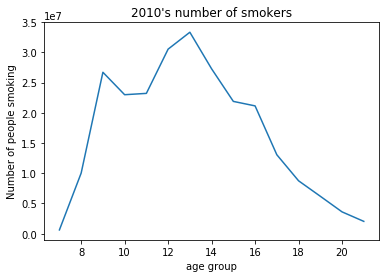

In [20]:
plt.title("2010's number of smokers")
plt.xlabel("range of age")
plt.ylabel("Number")
plt.plot(datanan2[datanan2["metric"]=="Number"]["age_group_id"],datanan2[datanan2["metric"]=="Number"]["mean"])
plt.xlabel('age group')
plt.ylabel('Number of people smoking')
plt.show()

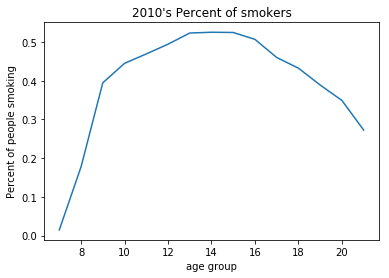

In [21]:
plt.title("2010's Percent of smokers")
plt.xlabel("range of age")
plt.ylabel("Percent")
plt.plot(datanan2[datanan2["metric"]=="Percent"]["age_group_id"],datanan2[datanan2["metric"]=="Percent"]["mean"])
plt.xlabel('age group')
plt.ylabel('Percent of people smoking')
plt.show()

2010年的数据佐证了上面的结论

<center> <font size=6>五、结论

## 本数据分析报告着重于对比中国和世界吸烟人口的变化趋势，并且试图从中国历史国情来解释1980年以来中国吸烟人口的变化，在最后对于吸烟对人的影响做了简要的预测和验证。

- 总的来说，中国男性的吸烟情况远比世界水平糟糕，在几乎所有的年龄段、所有的时间节点，中国男性吸烟比例都大于世界平均水平。
- 而中国女性吸烟情况在各个年龄段都较好，而且少有波动。
- 从历史发展角度来看，中国吸烟人口比例的几次重大变化都与政策、社会大环境变化有关。
- 对个人而言，本报告在最后已经指出，吸烟人口在50岁后比例逐年下降，这也是吸烟有害健康有利的佐证。

## 综合本报告所探索的所有数据和拓展报告，我认为要解决中国现在的吸烟困境，根本还在于政策的引导和个人对于吸烟危害的觉醒。